# Sieć Konwolucyjna (CNN)
To specjalny rodzaj sieci neuronowej, który jest zoptymalizowany do analizy danych o strukturze siatki takich jak obrazy.

Komputer widzi obraz jako macierz wartosci od [0,255] baiłty to 0 a czarny 255 (2D dla obrazów w skali szarosci (wyskosc x szerokosc) lub 3D dla obrazów kolorowych RGB (wysokosc x szerokosc x kanały)

Sieć konwolucyjna dokonuje klasyfikacji obiektów poprzez filtry przechodzace przez obraz wykrywając podstawowe wzory( karwędzie, linie, kąty)


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,Input
import matplotlib.pyplot as plt
from keras.models import Sequential
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.callbacks import Callback , EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from livelossplot import PlotLossesKeras 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model



### Wczytywanie danych

In [2]:
train_dir = r"..\input\train"
test_dir = r"..\input\test"

### Tworzenie generatora danych

In [3]:
datagen = ImageDataGenerator(rescale = 1.0/255.0, validation_split = 0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [4]:
model = Sequential([
    Input(shape=(64,64, 3)),
    Conv2D(32, (3, 3), activation='relu' ),
    BatchNormalization(),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25), 

    
    Conv2D(64, (3, 3), activation='relu' ,padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25), 

    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25), 

    Conv2D(256, (3, 3), activation='relu' ,padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25), 

    
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 60, 60, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,706,535 (6.51 MB)

 Trainable params: 1,703,591 (6.50 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [5]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
callbacks = [
    PlotLossesKeras(),
    EarlyStopping(monitor='val_loss', patience=5, verbose=1),
    
    ModelCheckpoint(filepath= r'..\models\emotion_model_CNN_model_{epoch:02d}_{val_loss:.2f}.keras', 
                    monitor='val_loss', save_best_only=True, mode='min' , verbose=1),
    ReduceLROnPlateau( monitor='val_loss', factor=0.1, patience=10, verbose=1, mode='auto', min_lr=1e-6 ) 
]


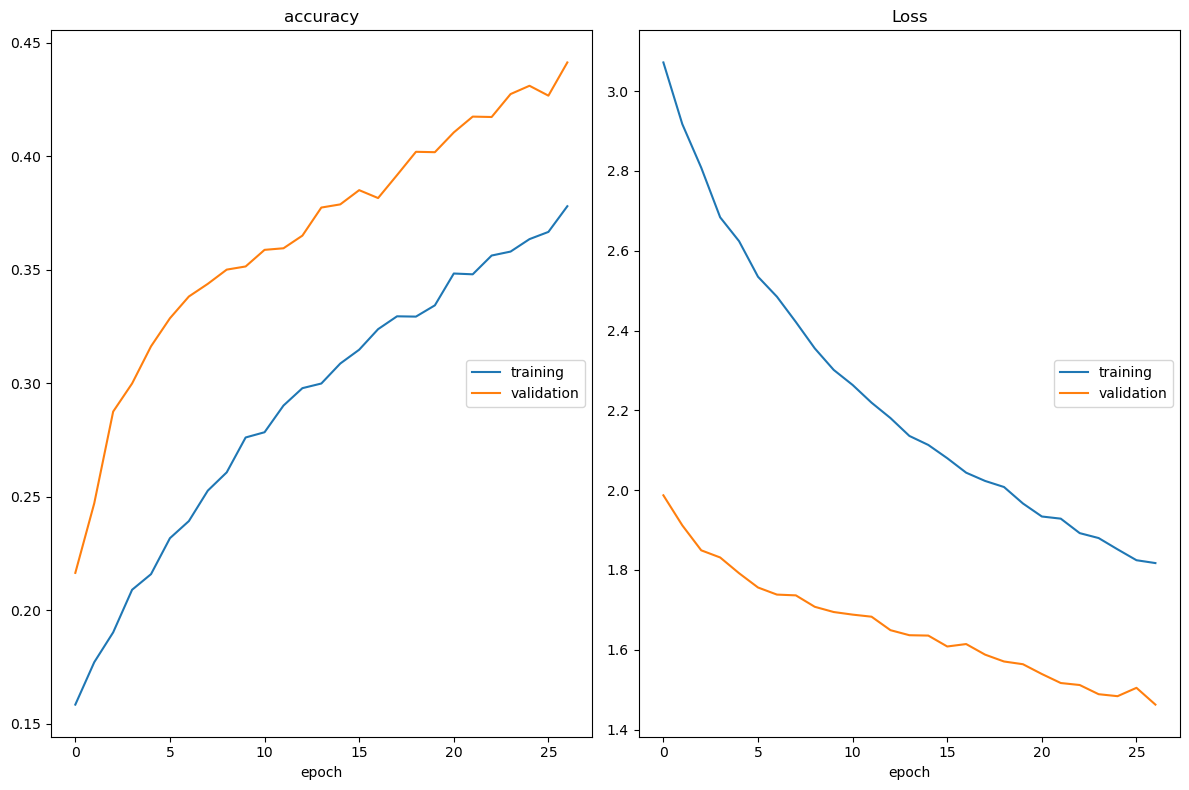

accuracy
	training         	 (min:    0.158, max:    0.378, cur:    0.378)
	validation       	 (min:    0.217, max:    0.441, cur:    0.441)
Loss
	training         	 (min:    1.817, max:    3.072, cur:    1.817)
	validation       	 (min:    1.463, max:    1.987, cur:    1.463)

Epoch 27: val_loss improved from 1.48380 to 1.46268, saving model to ..\models\emotion_model_CNN_model_27_1.46.keras
718/718 ━━━━━━━━━━━━━━━━━━━━ 386s 509ms/step - accuracy: 0.3760 - loss: 1.8215 - val_accuracy: 0.4414 - val_loss: 1.4627 - learning_rate: 1.0000e-05
Epoch 28/50
358/718 ━━━━━━━━━━━━━━━━━━━━ 2:49 471ms/step - accuracy: 0.3762 - loss: 1.7985

In [ ]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_generator,
        epochs=50,
        callbacks=callbacks,
        validation_data=validation_generator
    )

## Wnioski z wykresu

Proces uczenia sieci konwolucyjnej na podstawie metryk accuracy (dokładność) i loss (funkcja straty )

- dokładnosc walidacyjna przewyższa dokładnosc treningową. Może to wskazywac na lekkie niedouczenie modelu, prawdopodobnie model nie uczy sie wystarczająco dobrze
- starty walidacji i treningu zmniejszają sie w podobnym tepmie, co jest dobre

In [ ]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)

loss, accuracy = model.evaluate(test_generator, verbose=1)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Model Sieci Konwolucyjnej wydaje sie działac poprawnie, a bark dużej róznicy miedzy stratą walidacyjna a treningową sugeruje dobrą generalizacje 